<a href="https://colab.research.google.com/github/Konstantin5054232/ausbildungsprojekte/blob/main/04_mobilfunktarif/mobilfunktarif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ermittlung eines voraussichtlichen Tarifs für ein Telekommunikationsunternehmen

Den Kunden des Mobilfunkanbieters werden zwei Tarife angeboten: „Smart“ und „Ultra“. Es ist notwendig zu verstehen, welcher Tarif mehr Geld bringt. Wir müssen eine vorläufige Analyse der Tarife an einer kleinen Stichprobe von Kunden durchführen. Ihnen stehen die Daten von 500 Nutzern eines Telekommunikationsunternehmens zur Verfügung: wer sie sind, woher sie kommen, welchen Tarif sie nutzen, wie viele Anrufe und Nachrichten jeweils im Jahr 2018 versendet wurden. Es ist notwendig, das Verhalten der Kunden zu analysieren und Rückschlüsse darauf zu ziehen, welcher Tarif besser ist.

# Datenexploration

In [39]:
# Wir importieren die notwendigen Bibliotheken
import pandas as pd
import numpy as np
from scipy import stats as st

In [40]:
# Wir laden Tabellen mit Daten
data_calls = pd.read_csv('/content/calls.csv')
data_internet = pd.read_csv('/content/internet.csv')
data_messages = pd.read_csv('/content/messages.csv')
data_tariffs = pd.read_csv('/content/tariffs.csv')
data_users = pd.read_csv('/content/users.csv')

In [41]:
# Wir werden die erhaltenen Daten studieren
datas = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for file in datas:
    display(file.info())
    display(file.shape)
    display(file.head())
    display(file.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

(202607, 4)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

(149396, 5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

(123036, 3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

(2, 8)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

(500, 8)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


**Schlussfolgerungen**

Wir können sehen, dass die Spalten mit Datumsinformationen nicht korrekt formatiert sind. Die Dauer einiger Anrufe ist Null. Höchstwahrscheinlich handelt es sich um unbeantwortete Anrufe, daher werden wir solche Leitungen nicht löschen. Wir sehen auch, dass Abonnenten 0 MB mit separatem Zugang zum Internet ausgeben. Dies ist nicht möglich, wahrscheinlich handelt es sich um einen Datenfehler.

Wir sehen auch, dass einzelne Spalten nicht die Informationen enthalten, die wir für die Analyse benötigen, sie sollten gelöscht werden.

# Datenvorverarbeitung

In [42]:
# Wir werden die Anzahl der Duplikate mit einer Reihe von Methoden zählen data.duplicated().sum().
for file in datas:
    print(file.duplicated().sum())

0
0
0
0
0


In [43]:
# Wir werden zählen, wie viele Nullwerte sich in der Spalte mb_used der Tabelle data_internet befinden
count_null=0
for row in range (len(data_internet)):
    if data_internet['mb_used'][row] == 0:
        count_null += 1
display(count_null)

display(len(data_internet[data_internet['mb_used'] == 0]))

19598

19598

In [44]:
# Wir sind nicht daran interessiert, ohne Datenverkehr ins Internet zu gehen, wir werden solche Zeilen löschen
data_internet.drop(data_internet[data_internet['mb_used'] == 0].index, inplace=True)

display(data_internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    129798 non-null  int64  
 1   id            129798 non-null  object 
 2   mb_used       129798 non-null  float64
 3   session_date  129798 non-null  object 
 4   user_id       129798 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.9+ MB


None

In [45]:
# Wir werden Spalten entfernen, die für die Datenanalyse nicht benötigt werden
data_calls.drop(['id'], axis = 1, inplace = True)
data_internet.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
data_messages.drop(['id'], axis = 1, inplace = True)

In [46]:
# Wir werden das Datenformat für Spalten mit Datumsangaben ändern
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

In [47]:
# Mal sehen was passiert
for file in datas:
    display(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  202607 non-null  datetime64[ns]
 1   duration   202607 non-null  float64       
 2   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mb_used       129798 non-null  float64       
 1   session_date  129798 non-null  datetime64[ns]
 2   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_date  123036 non-null  datetime64[ns]
 1   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

**Schlussfolgerungen**

Keine Duplikate gefunden. Das Datenformat für Datumsangaben wurde geändert. Unnötige Spalten wurden entfernt. Wir haben auch Informationen über Abonnenten entfernt, die ohne Datenverkehr auf das Internet zugreifen.

# Berechnungen durchführen

In [48]:
# Wir extrahieren die Nummer des Monats aus den Anrufdaten, dem Senden von Nachrichten und dem Zugriff auf das Internet
# Wir werden die Gesprächsdauer und die Anzahl der Megabyte aufrunden, da die Tarife des Betreibers so gestaltet sind
data_calls['month'] = data_calls['call_date'].dt.month
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')
display(data_calls.head())

data_internet['month'] = data_internet['session_date'].dt.month
data_internet['mb_used'] = np.ceil(data_internet['mb_used']).astype('int')
display(data_internet.head())

data_messages['month'] = data_messages['message_date'].dt.month
display(data_messages.head())

,call_date,duration,user_id,month
0,2018-07-25,0,1000,7
1,2018-08-17,0,1000,8
2,2018-06-11,3,1000,6
3,2018-09-21,14,1000,9
4,2018-12-15,6,1000,12


,mb_used,session_date,user_id,month
0,113,2018-11-25,1000,11
1,1053,2018-09-07,1000,9
2,1198,2018-06-25,1000,6
3,551,2018-08-22,1000,8
4,303,2018-09-24,1000,9


,message_date,user_id,month
0,2018-06-27,1000,6
1,2018-10-08,1000,10
2,2018-08-04,1000,8
3,2018-06-16,1000,6
4,2018-12-05,1000,12


In [49]:
# Wir berechnen für jeden Benutzer: die Anzahl der getätigten Anrufe und der verbrachten Gesprächsminuten pro Monat; Anzahl versendeter Nachrichten nach Monat; 
# Volumen des Internetverkehrs, der von Monaten verwendet wird
data_calls_pivot = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=('sum', 'count')).reset_index()
data_calls_pivot.columns = ['user_id', 'month', 'calls_made', 'minutes_used']
display(data_calls_pivot.head(20))

data_messages_pivot = data_messages.pivot_table(index=['user_id', 'month'], aggfunc= 'count').reset_index()
data_messages_pivot.columns = ['user_id', 'month', 'messages_made']
display(data_messages_pivot.head(20))

data_internet_pivot = data_internet.pivot_table(index=['user_id', 'month'], aggfunc= 'sum').reset_index()
display(data_internet_pivot.head(20))

,user_id,month,calls_made,minutes_used
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


,user_id,month,messages_made
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
5,1000,10,14717
6,1000,11,14768
7,1000,12,9827
8,1001,11,18452
9,1001,12,14053


In [50]:
# Wir werden die Tabellen für jeden Benutzer und jede Monatsnummer zusammenstellen
data_itog_1 = data_calls_pivot.merge(data_messages_pivot, on=('user_id', 'month'), how='outer')
data_itog_2 = data_itog_1.merge(data_internet_pivot, on=('user_id', 'month'), how='outer')

In [51]:
# Wir werden ein Wörterbuch mit passenden Benutzern, ihren gewählten Tarifen und Wohnorten erstellen
user_dict = data_users[['user_id', 'tariff', 'city']]
user_dict.columns = ['user_id', 'tariff_name', 'city']

In [52]:
# Wir werden eine Tabelle mit Benutzerinformationen anhängen
data_itog_3 = data_itog_2.merge(user_dict, on=('user_id'), how='outer')

In [53]:
# Wir fügen eine Tabelle mit Informationen zu Tarifplänen bei
data_itog = data_itog_3.merge(data_tariffs, on=('tariff_name'), how='outer').sort_values('user_id')

In [54]:
# Mal sehen was passiert
data_itog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3209
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3214 non-null   float64
 2   calls_made             3174 non-null   float64
 3   minutes_used           3174 non-null   float64
 4   messages_made          2717 non-null   float64
 5   mb_used                3201 non-null   float64
 6   tariff_name            3216 non-null   object 
 7   city                   3216 non-null   object 
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
dtypes: f

In [55]:
# Wir werden Nullwerte mit Nullen auffüllen
data_itog = data_itog.fillna(0)

In [56]:
# Wir werden das Ergebnis der Arbeit sehen
display(data_itog.info())
display(data_itog.isnull().sum())

display(data_itog.head(10))
display(data_itog.tail(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3209
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   month                  3216 non-null   float64
 2   calls_made             3216 non-null   float64
 3   minutes_used           3216 non-null   float64
 4   messages_made          3216 non-null   float64
 5   mb_used                3216 non-null   float64
 6   tariff_name            3216 non-null   object 
 7   city                   3216 non-null   object 
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
dtypes: f

None

user_id                  0
month                    0
calls_made               0
minutes_used             0
messages_made            0
mb_used                  0
tariff_name              0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,10.0,57.0,350.0,73.0,14717.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,11.0,43.0,338.0,58.0,14768.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,12.0,46.0,333.0,70.0,9827.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
987,1001,12.0,63.0,414.0,0.0,14053.0,smart,Москва,50,15360,500,550,200,3,3
986,1001,11.0,59.0,430.0,0.0,18452.0,smart,Москва,50,15360,500,550,200,3,3


,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3201,1497,12.0,71.0,545.0,17.0,19940.0,smart,Челябинск,50,15360,500,550,200,3,3
3199,1497,10.0,66.0,490.0,20.0,11512.0,smart,Челябинск,50,15360,500,550,200,3,3
3203,1498,8.0,57.0,400.0,62.0,24270.0,smart,Владикавказ,50,15360,500,550,200,3,3
3202,1498,7.0,23.0,175.0,20.0,7486.0,smart,Владикавказ,50,15360,500,550,200,3,3
3205,1498,10.0,41.0,247.0,42.0,20604.0,smart,Владикавказ,50,15360,500,550,200,3,3
3204,1498,9.0,59.0,471.0,44.0,22166.0,smart,Владикавказ,50,15360,500,550,200,3,3
3206,1499,9.0,9.0,70.0,11.0,1848.0,smart,Пермь,50,15360,500,550,200,3,3
3207,1499,10.0,68.0,449.0,48.0,17809.0,smart,Пермь,50,15360,500,550,200,3,3
3208,1499,11.0,74.0,612.0,59.0,17984.0,smart,Пермь,50,15360,500,550,200,3,3
3209,1499,12.0,69.0,492.0,66.0,13077.0,smart,Пермь,50,15360,500,550,200,3,3


In [57]:
# Wir berechnen, wie viele Gesprächsminuten, Nachrichten und MB Internet von Abonnenten über die vom Tarif festgelegten Grenzen hinaus genutzt werden
# Wir konvertieren MB in GB. Wir fügen der Tabelle die entsprechenden Spalten hinzu
data_itog['minutes_to_pay'] = (data_itog['minutes_used'] - data_itog['minutes_included']) 
data_itog['gb_to_pay'] = np.ceil((data_itog['mb_used'] - data_itog['mb_per_month_included']) / 1024)
data_itog['messages_to_pay'] = (data_itog['messages_made'] - data_itog['messages_included']) 

In [58]:
# Negative Werte machen wir gleich Null, positive Werte werden in die Tabelle geschrieben
def payment (pay):
    if pay < 0:
        return 0
    return pay

data_itog['minutes_to_pay_1'] = data_itog['minutes_to_pay'].apply(payment)
data_itog['gb_to_pay_1'] = data_itog['gb_to_pay'].apply(payment)
data_itog['messages_to_pay_1'] = data_itog['messages_to_pay'].apply(payment)

In [59]:
# Wir berechnen die monatlichen Einnahmen von jedem Benutzer
data_itog['income'] = data_itog['minutes_to_pay_1']*data_itog['rub_per_minute']+data_itog['gb_to_pay_1']*data_itog['rub_per_gb']+data_itog['messages_to_pay_1']*data_itog['rub_per_message']+data_itog['rub_monthly_fee']

In [60]:
# Mal sehen was passiert
display(data_itog.head(20))
display(data_itog.tail(20))

,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,minutes_to_pay,gb_to_pay,messages_to_pay,minutes_to_pay_1,gb_to_pay_1,messages_to_pay_1,income
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,...,150,1,1,-2841.0,-27.0,-978.0,0.0,0.0,0.0,1950.0
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,...,150,1,1,-2828.0,-7.0,-940.0,0.0,0.0,0.0,1950.0
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,...,150,1,1,-2660.0,-16.0,-925.0,0.0,0.0,0.0,1950.0
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,...,150,1,1,-2592.0,-16.0,-919.0,0.0,0.0,0.0,1950.0
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,...,150,1,1,-2534.0,-15.0,-943.0,0.0,0.0,0.0,1950.0
5,1000,10.0,57.0,350.0,73.0,14717.0,ultra,Краснодар,1000,30720,...,150,1,1,-2650.0,-15.0,-927.0,0.0,0.0,0.0,1950.0
6,1000,11.0,43.0,338.0,58.0,14768.0,ultra,Краснодар,1000,30720,...,150,1,1,-2662.0,-15.0,-942.0,0.0,0.0,0.0,1950.0
7,1000,12.0,46.0,333.0,70.0,9827.0,ultra,Краснодар,1000,30720,...,150,1,1,-2667.0,-20.0,-930.0,0.0,0.0,0.0,1950.0
987,1001,12.0,63.0,414.0,0.0,14053.0,smart,Москва,50,15360,...,200,3,3,-86.0,-1.0,-50.0,0.0,0.0,0.0,550.0
986,1001,11.0,59.0,430.0,0.0,18452.0,smart,Москва,50,15360,...,200,3,3,-70.0,4.0,-50.0,0.0,4.0,0.0,1350.0


,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,minutes_to_pay,gb_to_pay,messages_to_pay,minutes_to_pay_1,gb_to_pay_1,messages_to_pay_1,income
3196,1496,10.0,72.0,450.0,35.0,28215.0,smart,Вологда,50,15360,...,200,3,3,-50.0,13.0,-15.0,0.0,13.0,0.0,3150.0
3197,1496,11.0,80.0,662.0,46.0,25092.0,smart,Вологда,50,15360,...,200,3,3,162.0,10.0,-4.0,162.0,10.0,0.0,3036.0
3198,1496,12.0,80.0,518.0,51.0,20757.0,smart,Вологда,50,15360,...,200,3,3,18.0,6.0,1.0,18.0,6.0,1.0,1807.0
3187,1496,1.0,7.0,48.0,9.0,3766.0,smart,Вологда,50,15360,...,200,3,3,-452.0,-11.0,-41.0,0.0,0.0,0.0,550.0
3191,1496,5.0,63.0,484.0,40.0,23740.0,smart,Вологда,50,15360,...,200,3,3,-16.0,9.0,-10.0,0.0,9.0,0.0,2350.0
3188,1496,2.0,77.0,594.0,45.0,28523.0,smart,Вологда,50,15360,...,200,3,3,94.0,13.0,-5.0,94.0,13.0,0.0,3432.0
3189,1496,3.0,79.0,557.0,46.0,24990.0,smart,Вологда,50,15360,...,200,3,3,57.0,10.0,-4.0,57.0,10.0,0.0,2721.0
3190,1496,4.0,67.0,521.0,49.0,21098.0,smart,Вологда,50,15360,...,200,3,3,21.0,6.0,-1.0,21.0,6.0,0.0,1813.0
3192,1496,6.0,74.0,555.0,35.0,20163.0,smart,Вологда,50,15360,...,200,3,3,55.0,5.0,-15.0,55.0,5.0,0.0,1715.0
3200,1497,11.0,64.0,371.0,14.0,14174.0,smart,Челябинск,50,15360,...,200,3,3,-129.0,-1.0,-36.0,0.0,0.0,0.0,550.0


**Schlussfolgerungen**

Wir haben berechnet, wie viele Anrufe jeder Teilnehmer monatlich tätigt, inkl. unbeantwortet, verbringt Minuten mit Gesprächen, sendet Nachrichten und verbraucht Datenverkehr. Dann haben wir herausgefunden, wie viele Minuten, Nachrichten und GB jeder Abonnent über dem Limit des gewählten Tarifs verbringt und die Einnahmen für jeden Abonnenten pro Monat berechnet.

# Datenanalyse

In [61]:
# Wir werden die Tabelle nach Arten der ausgewählten Tarife in zwei Teile teilen
data_itog_smart = data_itog[data_itog['tariff_name'] == 'smart']
data_itog_ultra = data_itog[data_itog['tariff_name'] == 'ultra']

In [62]:
# Wir berechnen für jeden Tarif die durchschnittliche Anzahl an Minuten, Nachrichten und Traffic pro Monat, 
# sowie die Dispersion und Standardabweichung
print('Durchschnittliche Anzahl an Minuten pro Monat für Smart-Abonnenten: ',format(data_itog_smart['minutes_used'].mean().astype('int')))
print('Durchschnittliche Anzahl an Minuten pro Monat für Ultra-Abonnenten: ',format(data_itog_ultra['minutes_used'].mean().astype('int')))
print('Durchschnittliche Anzahl von Nachrichten pro Monat für Smart-Abonnenten: ',format(data_itog_smart['messages_made'].mean().astype('int')))
print('Durchschnittliche Anzahl von Nachrichten pro Monat für Ultra-Abonnenten: ',format(data_itog_ultra['messages_made'].mean().astype('int')))
print('Durchschnittliche MB pro Monat für Smart-Abonnenten: ',format(data_itog_smart['mb_used'].mean().astype('int')))
print('Durchschnittliche MB pro Monat für Ultra-Abonnenten: ',format(data_itog_ultra['mb_used'].mean().astype('int')))
print ()

print('Dispersion der Minuten pro Monat für Smart-Abonnenten: {:.2f}'.format(data_itog_smart['minutes_used'].var()))
print('Dispersion der Minuten pro Monat für Ultra-Abonnenten: {:.2f}'.format(data_itog_ultra['minutes_used'].var()))
print('Dispersion der Nachrichten pro Monat für Smart-Abonnenten: {:.2f}'.format(data_itog_smart['messages_made'].var()))
print('Dispersion der Nachrichten pro Monat für Ultra-Abonnenten: {:.2f}'.format(data_itog_ultra['messages_made'].var()))
print('Dispersion Mb pro Monat für Smart-Abonnenten: {:.2f}'.format(data_itog_smart['mb_used'].var()))
print('Dispersion Mb pro Monat für Ultra-Abonnenten: {:.2f}'.format(data_itog_ultra['mb_used'].var()))
print ()

print('Standardabweichung der Minuten pro Monat für Smart-Abonnenten: {:.2f}'.format(data_itog_smart['minutes_used'].std()))
print('Standardabweichung der Minuten pro Monat für Ultra-Abonnenten: {:.2f}'.format(data_itog_ultra['minutes_used'].std()))
print('Standardabweichung der Nachrichten pro Monat für Smart-Abonnenten: {:.2f}'.format(data_itog_smart['messages_made'].std()))
print('Standardabweichung der Nachrichten pro Monat für Ultra-Abonnenten: {:.2f}'.format(data_itog_ultra['messages_made'].std()))
print('Standardabweichung Mb pro Monat für Smart-Abonnenten: {:.2f}'.format(data_itog_smart['mb_used'].std()))
print('Standardabweichung Mb pro Monat für Ultra-Abonnenten: {:.2f}'.format(data_itog_ultra['mb_used'].std()))

Durchschnittliche Anzahl an Minuten pro Monat für Smart-Abonnenten:  417
Durchschnittliche Anzahl an Minuten pro Monat für Ultra-Abonnenten:  526
Durchschnittliche Anzahl von Nachrichten pro Monat für Smart-Abonnenten:  33
Durchschnittliche Anzahl von Nachrichten pro Monat für Ultra-Abonnenten:  49
Durchschnittliche MB pro Monat für Smart-Abonnenten:  16221
Durchschnittliche MB pro Monat für Ultra-Abonnenten:  19467

Dispersion der Minuten pro Monat für Smart-Abonnenten: 36281.39
Dispersion der Minuten pro Monat für Ultra-Abonnenten: 101052.49
Dispersion der Nachrichten pro Monat für Smart-Abonnenten: 796.96
Dispersion der Nachrichten pro Monat für Ultra-Abonnenten: 2285.42
Dispersion Mb pro Monat für Smart-Abonnenten: 34648523.30
Dispersion Mb pro Monat für Ultra-Abonnenten: 102217264.28

Standardabweichung der Minuten pro Monat für Smart-Abonnenten: 190.48
Standardabweichung der Minuten pro Monat für Ultra-Abonnenten: 317.89
Standardabweichung der Nachrichten pro Monat für Smart-Abon

In [63]:
# Wir erstellen eine Tabelle mit einem Multi-Index
l1 = ['calls_made', 'minutes_used', 'messages_made', 'mb_used']
l2 = ['mean', 'var', 'std']
idx = pd.MultiIndex.from_product([l1, l2])

print(idx)

print('\n\n\nIndizes: ', idx[0], 'Erste: ', idx[0][0], 'Zweite: ', idx[0][1])

df = pd.DataFrame(index=['smart', 'ultra'], columns=idx)

for i in df.columns:
    #  Slicing nach dem ersten Index, Aggregation nach dem zweiten. 
    df.loc['smart',i] = np.round(data_itog.query('tariff_name=="smart"')[i[0]].agg(i[1]),2)
    df.loc['ultra',i] = np.round(data_itog.query('tariff_name=="ultra"')[i[0]].agg(i[1]),2)
    
df    

MultiIndex([(   'calls_made', 'mean'),
            (   'calls_made',  'var'),
            (   'calls_made',  'std'),
            ( 'minutes_used', 'mean'),
            ( 'minutes_used',  'var'),
            ( 'minutes_used',  'std'),
            ('messages_made', 'mean'),
            ('messages_made',  'var'),
            ('messages_made',  'std'),
            (      'mb_used', 'mean'),
            (      'mb_used',  'var'),
            (      'mb_used',  'std')],
           )



Indizes:  ('calls_made', 'mean') Erste:  calls_made Zweite:  mean


calls_made                 minutes_used                     \
            mean      var    std         mean        var     std   
smart      58.44   674.11  25.96       417.75   36281.39  190.48   
ultra      73.32  1932.19  43.96       526.09  101052.49  317.89   

      messages_made                   mb_used                          
               mean      var    std      mean           var       std  
smart         33.37   796.96  28.23  16221.91    34648523.3    5886.3  
ultra         49.31  2285.42  47.81  19467.14  102217264.28  10110.26

In [64]:
# Wir erstellen eine Pivot-Tabelle mit dem Ergebnis
data_itog.pivot_table(index='tariff_name', values=['calls_made', 'minutes_used', 'messages_made', 'mb_used'],
                     aggfunc=['mean', 'var', 'std'])

mean                                                   var  \
            calls_made       mb_used messages_made minutes_used   calls_made   
tariff_name                                                                    
smart        58.437220  16221.910762     33.369058   417.747534   674.107093   
ultra        73.318458  19467.137931     49.313387   526.089249  1932.194928   

                                                              std  \
                  mb_used messages_made   minutes_used calls_made   
tariff_name                                                         
smart        3.464852e+07    796.955256   36281.393836  25.963572   
ultra        1.022173e+08   2285.417425  101052.493549  43.956739   

                                                      
                  mb_used messages_made minutes_used  
tariff_name                                           
smart         5886.299627     28.230396   190.476754  
ultra        10110.255401     47.806040   317.887549

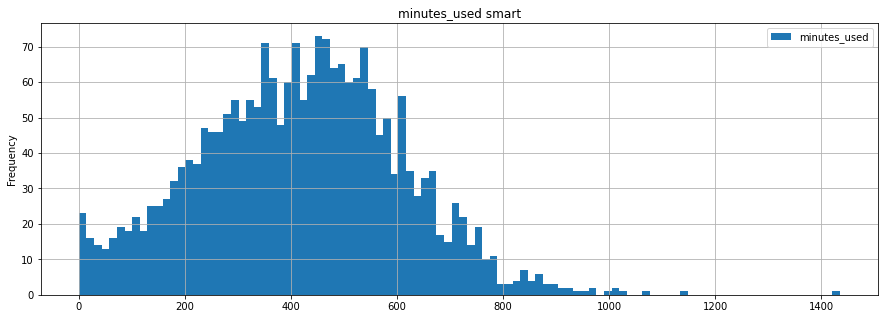

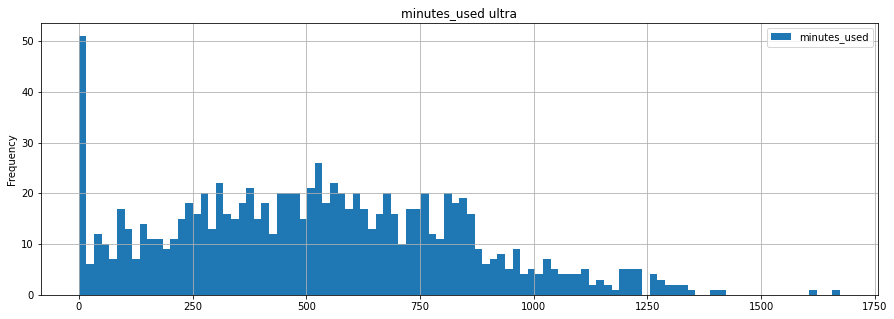

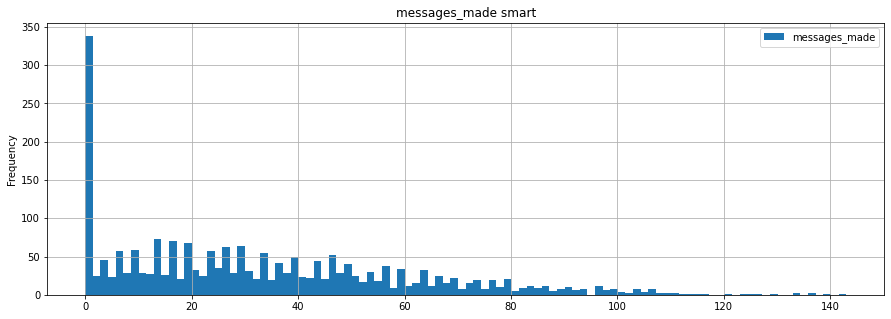

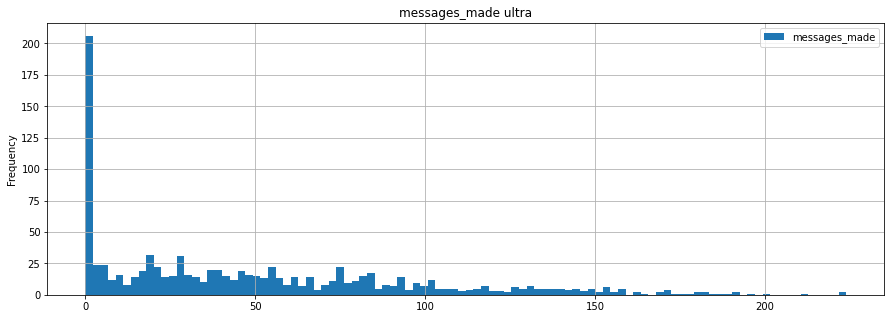

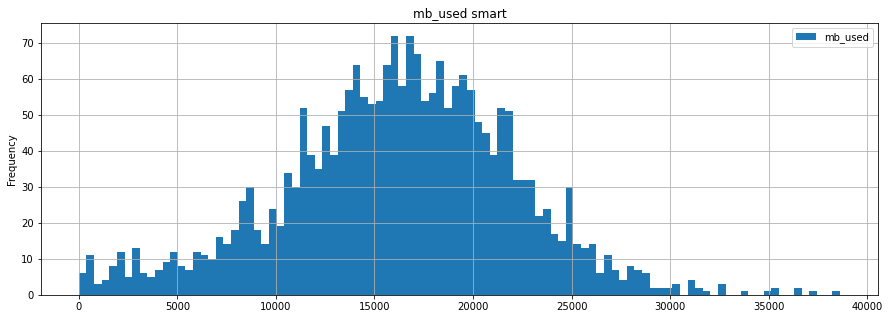

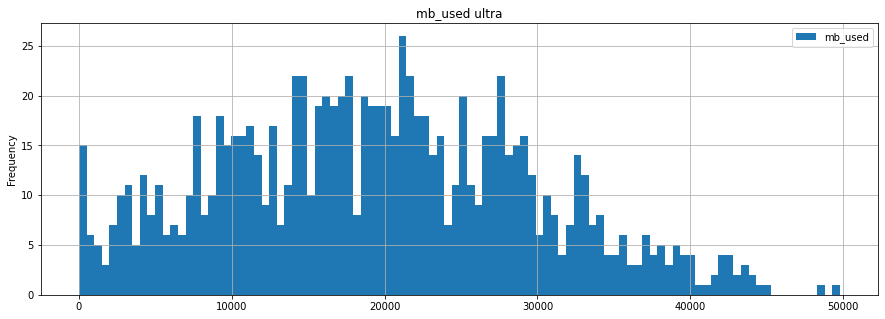

In [65]:
# Wir werden Diagramme der Verteilung von Anrufminuten, gesendeten Nachrichten und verbrauchtem Datenverkehr erstellen
data_itog_smart.plot(title = 'minutes_used smart', kind='hist', y='minutes_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data_itog_ultra.plot(title = 'minutes_used ultra', kind='hist', y='minutes_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

data_itog_smart.plot(title = 'messages_made smart', kind='hist', y='messages_made', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data_itog_ultra.plot(title = 'messages_made ultra', kind='hist', y='messages_made', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

data_itog_smart.plot(title = 'mb_used smart', kind='hist', y='mb_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data_itog_ultra.plot(title = 'mb_used ultra', kind='hist', y='mb_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

tariff_name
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: minutes_used, dtype: object

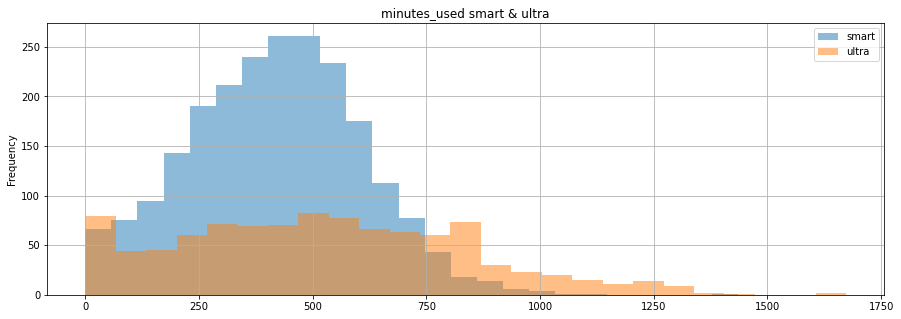

In [66]:
data_itog.groupby('tariff_name')['minutes_used'].plot.hist(title = 'minutes_used smart & ultra', alpha=0.5, grid=True, legend=True, bins=25, figsize=(15,5))

**Schlussfolgerungen**

Aus den gewonnenen Daten sehen wir, dass Abonnenten, die sich für den Ultra-Tarif entschieden haben, den Mobilfunk aktiver nutzen als Abonnenten mit dem Smart-Tarif, d.h. sie sprechen mehr Minuten pro Monat, senden mehr Nachrichten und verbrauchen mehr Datenverkehr. In den Minutennutzungsdiagrammen sehen wir einen signifikanten Ausreißer von Anrufen mit null verbrauchten Minuten. Höchstwahrscheinlich werden SIM-Karten mit einem Ultra-Tarif meistens nur für den Zugriff auf das Internet und die Nutzung auf einem Tablet oder Computer gekauft. Wir sehen auch, dass viele Abonnenten beider Tarife keine SMS versenden. Dies kann an der weiten Verbreitung verschiedener Botenstoffe liegen. Die Nutzung des Datenverkehrs durch die Abonnenten des Ultra-Tarifs ist nicht so einheitlich wie im Smart-Tarif. Dies liegt daran, dass viele Ultra-Abonnenten eine SIM-Karte nur für das Internet und einige sowohl für das Internet als auch für Anrufe verwenden.

# Hypothesentest

In [67]:
# Nullhypothese: Die durchschnittlichen Umsatz der Nutzer von Ultra- und Smart-Tarifen sind gleich.
# Alternativhypothese: Der durchschnittliche Umsatz der Nutzer von Ultra- und Smart-Tarifen ist unterschiedlich.
# Wir testen die Nullhypothese und berechnen den durchschnittlichen Umsatz.
alpha = 0.1 
results = st.ttest_ind(data_itog_smart['income'], data_itog_ultra['income'])
print('p-Bedeutung:', results.pvalue)
if results.pvalue < alpha:
    print('Ablehnung der Nullhypothese')
else:
    print('Die Nullhypothese konnte nicht zurückgewiesen werden')
    
display(data_itog_smart['income'].mean())
display(data_itog_ultra['income'].mean())

p-Bedeutung: 1.7023268870439853e-158
Ablehnung der Nullhypothese


1294.3053811659192

2070.943204868154

In [68]:
# Nullhypothese: Der durchschnittliche Umsatz der Nutzer aus Moskau ist gleich dem Umsatz der Nutzer aus anderen Regionen.
# Alternativhypothese: Die durchschnittlichen Einnahmen der Nutzer aus Moskau unterscheiden sich von den Einnahmen der Nutzer aus anderen Regionen/
# Wir testen die Nullhypothese und berechnen den durchschnittlichen Umsatz.
data_itog_Moscow = data_itog[data_itog['city'] == 'Москва']
data_itog_Regions = data_itog[data_itog['city'] != 'Москва']

alpha = 0.01
results = st.ttest_ind(data_itog_Moscow['income'], data_itog_Regions['income'])
print('p-Bedeutung:', results.pvalue)
if results.pvalue < alpha:
    print('Ablehnung der Nullhypothese')
else:
    print('Die Nullhypothese konnte nicht zurückgewiesen werden')
    
display(data_itog_Moscow['income'].mean())
display(data_itog_Regions['income'].mean())

p-Bedeutung: 0.5277299573181309
Die Nullhypothese konnte nicht zurückgewiesen werden


1550.8052373158755

1528.1032629558542

**Schlussfolgerungen**

Die Nullhypothese muss Gleichheit enthalten. Wir sehen, dass der durchschnittliche Umsatz der Nutzer der Ultra- und Smart-Tarife unterschiedlich ist. Der Alpha-Wert ist recht hoch angesetzt: 0,1. Die Nullhypothese wird verworfen.

Bei der Bestimmung der Differenz der durchschnittlichen Einnahmen von Abonnenten aus Moskau und anderen Städten sehen wir, dass sich die durchschnittlichen Einnahmen nicht wesentlich unterscheiden, sodass die Nullhypothese bestätigt wird.

# Allgemeine Schlussfolgerung

Wir haben eine Studie über das Verhalten von Benutzern durchgeführt, die sich für verschiedene Tarife eines Mobilfunkanbieters entschieden haben.

Die zur Analyse bereitgestellten Daten enthielten eine Reihe erheblicher Mängel, die behoben wurden.

Wir haben einige wichtige Indikatoren berechnet, die wir für die Analyse benötigen: wie viele Anrufe jeder Teilnehmer jeden Monat tätigt, inkl. unbeantwortet, verbringt Minuten mit Gesprächen, sendet Nachrichten und verbraucht Datenverkehr. Dann haben wir herausgefunden, wie viele Minuten, Nachrichten und GB jeder Abonnent über dem Limit des gewählten Tarifs verbringt und die Einnahmen für jeden Abonnenten pro Monat berechnet.

Die durchgeführten Berechnungen ermöglichten es uns, das Verhalten der Abonnenten für jeden der verfügbaren Tarife zu beschreiben.

Wir haben festgestellt, dass die durchschnittlichen Einnahmen für verschiedene Tarife unterschiedlich sind. Die Mobilfunkbetreiber sollten sich auf die Entwicklung von Tarifen der Ultra-Linie konzentrieren, da sie profitabler sind.

Aber die Einnahmen in Moskau unterscheiden sich praktisch nicht von den Einnahmen in anderen Städten und Regionen.